Day09 - 05:08:00

* `**Replace mnist to CIFAR-10**`

https://www.kaggle.com/c/cifar-10

CIFAR-10 Dataset as it suggests has 10 different categories of images in
it. There is a total of 60000 images of 10 different classes naming , ,, , ,,,,,. All the images are of size 32×32. There are in total 50000 train images and 10000 test images.

Please use this code to get the data and use Tensorflow, Keras and CNN to classify images.


Please run this code to get the data
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # download data
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # load data

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [2]:
print(f'{x_train.shape} {y_train.shape} {x_test.shape} {y_test.shape}')
# (50000, 32, 32, 3) , 50000 samples, 32x32x3 image 32x32 pixel , 3 color

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


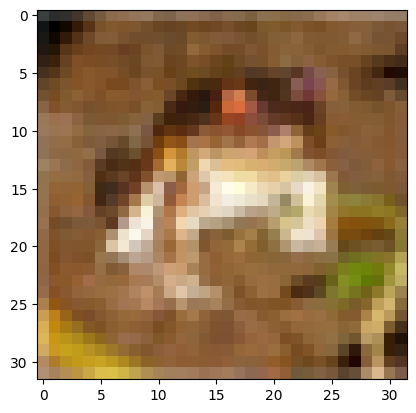

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # show first image

In [4]:
# Maximum color verisi 255 olacağından hepsini 255'e bölerek normalize ediyoruz
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Convert class labels to one-hot encoded vectors
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

## Convolutional Neural Network - CNNs Image Classification - Kenny?

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, InputLayer, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

In [7]:
model=Sequential() # Model name

model.add(InputLayer(input_shape=(32,32,3)))
model.add(Reshape(target_shape=(32,32,3))) # her pikselde 3 color number var
# filters her bir büyük kare
model.add(Conv2D(filters=12, kernel_size = (3,3), activation="relu")) # Conv2D, LSTM, GAN(Yeni resim), 3x3 alır
model.add(MaxPooling2D(pool_size=(2,2))) # 2x2 al max al
model.add(Dropout(0.25)) # Overfittingi engellemek için
model.add(BatchNormalization()) # Normalize etmek için
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Flatten()) # 1 boyutlu sütun haline getirir
model.add(Dense(10)) # 10 farklı cevap var

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [8]:
# model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

In [11]:
"""
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')
# Something is wrong lets build new model
"""

"\ntest_loss, test_acc = model.evaluate(x_test, y_test)\nprint(f'Test loss: {test_loss}')\nprint(f'Test accuracy: {test_acc}')\n# Something is wrong lets build new model\n"

In [12]:
#model.save("CIFAR-10.h5")

# Model 2 - CIFAR_10 CNN

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # download data
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # load data

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Maximum color verisi 255 olacağından hepsini 255'e bölerek normalize ediyoruz
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, InputLayer, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

In [18]:
model = Sequential()

model.add(InputLayer(input_shape=(32, 32, 3)))

# İlk Convolutional katmanı ve MaxPooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# İkinci Convolutional katmanı
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# Üçüncü Convolutional katmanı
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# Flatten katmanı
model.add(Flatten())

# Dense katmanları
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Modeli eğitme
model.fit(x_train, y_train, batch_size=64,epochs=10,
          validation_data=(x_test, y_test))



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2775 - loss: 2.1519 - val_accuracy: 0.4195 - val_loss: 1.7022
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4728 - loss: 1.4560 - val_accuracy: 0.4905 - val_loss: 1.5430
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5390 - loss: 1.2846 - val_accuracy: 0.6328 - val_loss: 1.0448
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5813 - loss: 1.1728 - val_accuracy: 0.5296 - val_loss: 1.3672
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6116 - loss: 1.1063 - val_accuracy: 0.6805 - val_loss: 0.9206
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6330 - loss: 1.0461 - val_accuracy: 0.6193 - val_loss: 1.1268
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6492 - loss: 1.0056 - val_accuracy: 0.6970 - val_loss: 0.8676
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6593 - loss: 0.9748 - val_accuracy: 

In [19]:
"""
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

# Better but not good lets steal and build new model 3
"""

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6794 - loss: 0.9258
Test loss: 0.920630693435669
Test accuracy: 0.6790000200271606


# Model 3 - CIFAR_03

CIFAR-10 | Image Classification | Using CNN
https://www.kaggle.com/code/devsubhash/cifar-10-image-classification-using-cnn


In [5]:
# getting started with the model
# importing required libraries/packages
!pip install visualkeras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 4.5 MB/s eta 0:00:00


## ✏️ Importing & Reading the dataset 📝

In [6]:
# Importing the CIFAR-10 dataset from Keras
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [7]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


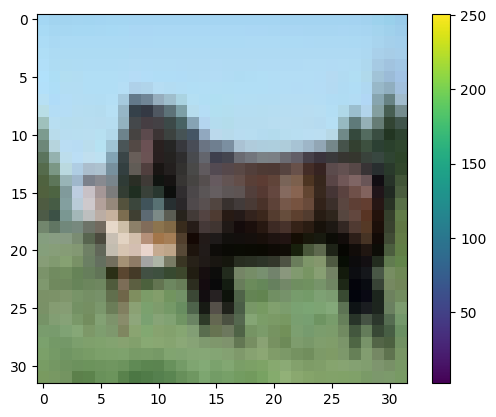

In [8]:
plt.figure()
plt.imshow(X_train[12])
plt.colorbar()

## Normalizing and One-Hot Encoding 🗝
📌 We have to normalize the data in order to reduce the pixel values. Currently, all the image pixels are in a range from 0–255, and we want the values in the range of 0 and 1. So we can either divide all the pixel values by 255.0 or use the ‘normalize’ command from keras library. As CIFAR-10 has 10 classes, we are using the ‘to_categorical()’ method to one-hot encode the data.

In [9]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding # this one hot is problem I think for my project
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

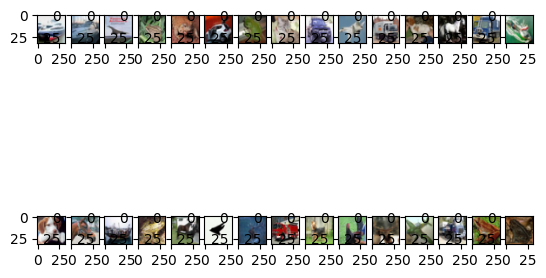

In [10]:
# Visualizing the data
for i in range(1,31):
  plt.subplot(2, 15, i)
  plt.imshow(X_test[i])

## 🔨 Building Base Model 🔧 Trying TPU

In [17]:
# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.TPUStrategy(tpu)

In [11]:
#with tpu_strategy.scope():
      # Base Model
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [13]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 3, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,408 (1.39 MB)

 Trainable params: 121,802 (475.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,606 (951.59 KB)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4176 - loss: 1.6120 - val_accuracy: 0.5141 - val_loss: 1.3655
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5679 - loss: 1.2279 - val_accuracy: 0.5989 - val_loss: 1.1469
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6192 - loss: 1.0777 - val_accuracy: 0.6249 - val_loss: 1.0703


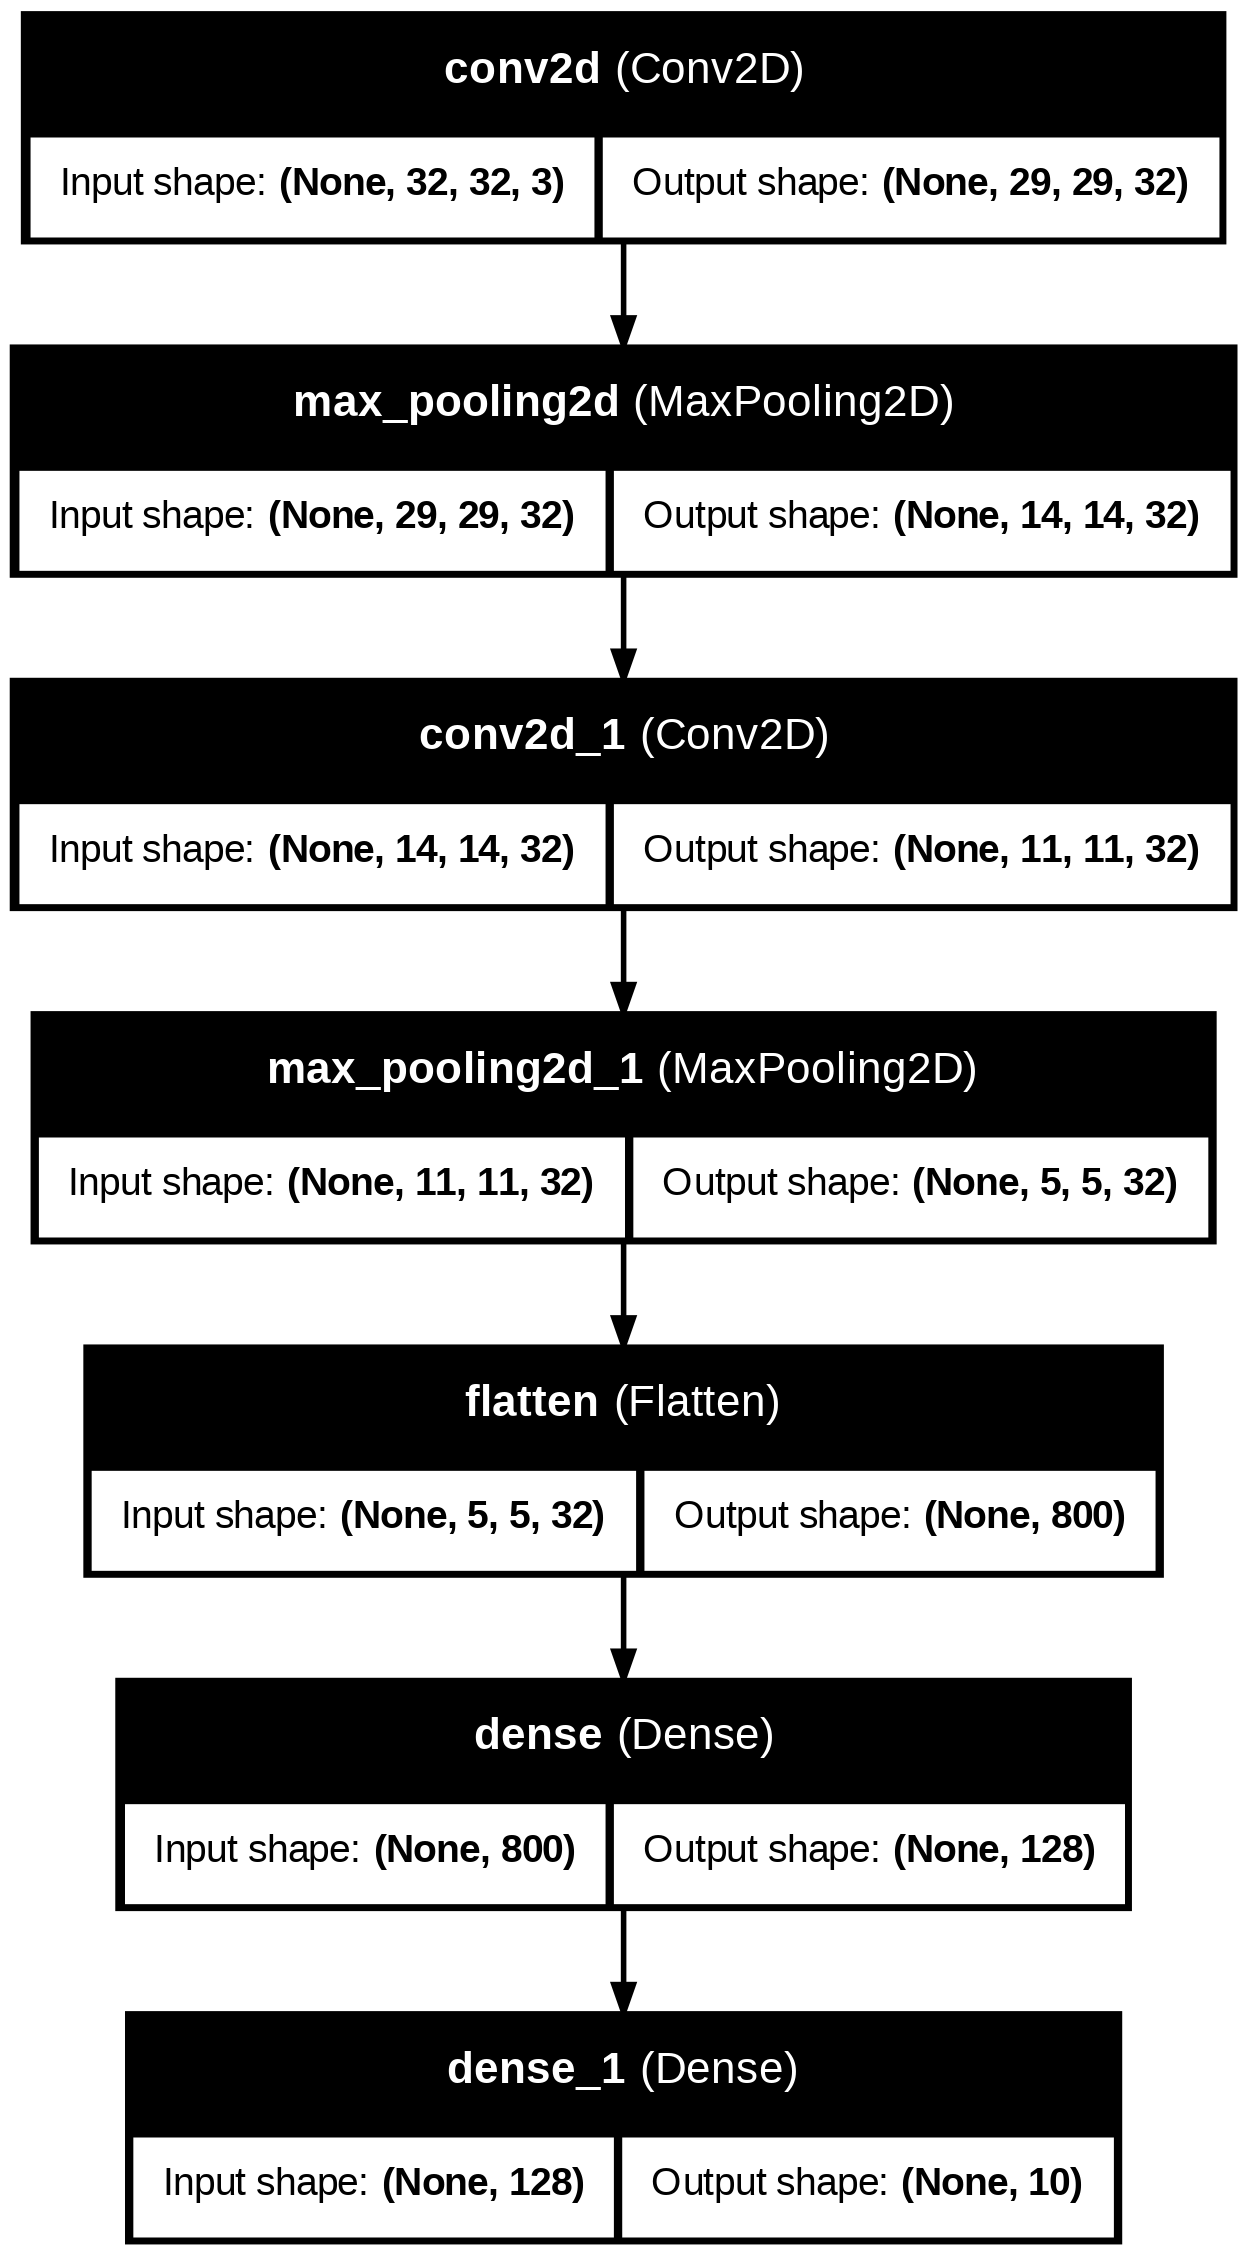

In [14]:
#!pip install pydot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

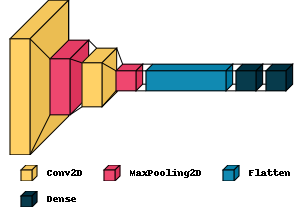

In [15]:
visualkeras.layered_view(model, legend=True)

In [23]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 8ms/step - loss: 2.2560 - accuracy: 0.6596
Test Accuracy of Base Model: 0.659600019454956


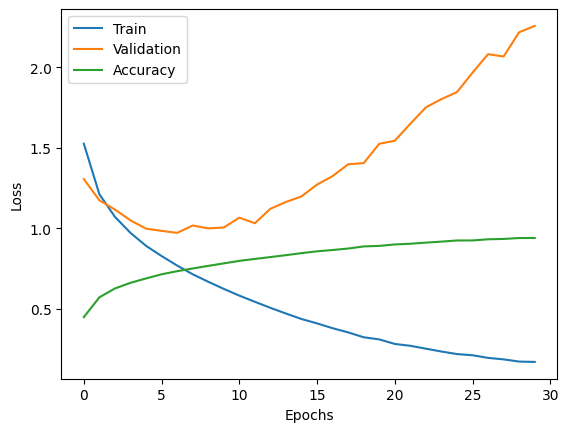

In [24]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history)

### Another model add Dropoout and Batch Normalization

In [16]:
# Model_3 with Batch Normalization
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))

model_3.add(Flatten())

model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### My Runtime TPU over in 25. epoch

In [17]:
#model_3.summary()
#history_3 = model_3.fit(X_train, Y_train_en, epochs = 30, verbose = 1, validation_data = (X_test, Y_test_en))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/3
 194/1563 ━━━━━━━━━━━━━━━━━━━━ 28:51 1s/step - accuracy: 0.2171 - loss: 2.8155

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

In [ ]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_3)

In [ ]:
model_3.save("CIFAR10.h5") # Save the best model